## **Introduction**
In the first version of the project, I like to do exploratory data analysis. This is where I analyze the data in detail to understand the independent variables and how they relate to one another. This version does not involve any modelling. It is mostly for exploratory data analysis. 

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Get the dataset
dataset = pd.read_csv('loan.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Analysis
There are columns that have missing values. The total values should be 614. 
Gender, Married, dependents, self-employed, LoanAmount, LoanAmountTerm, and Credit_History all feaure missing values. 
This is important information to have.

## Way Forward
From here, the way forward is to analyze each column and determine its impact on the loan status. The first column is the gender. Does this have an impact on the person's ability to pay a loan?

In [16]:
pd.crosstab(dataset['Gender'], dataset['Loan_Status'], margins = True)

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


Gender
Female    0.669643
Male      0.693252
Name: Loan_Status, dtype: float64


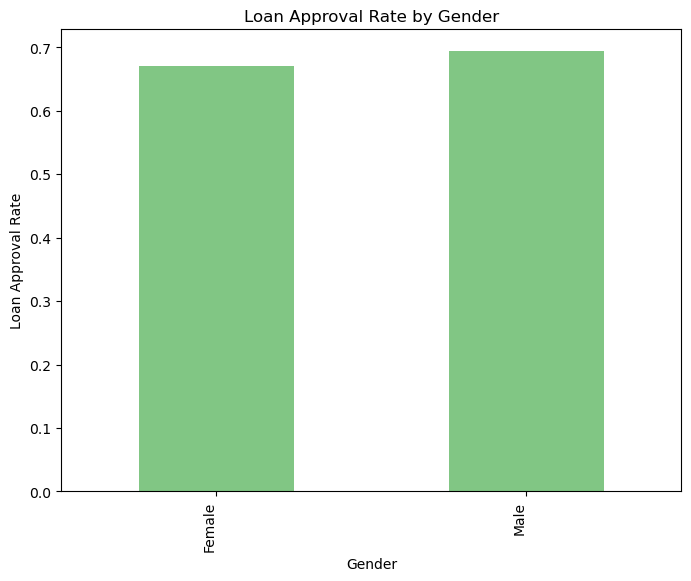

In [19]:
# Visual representation of how each gender pays their loans
loan_approval_rate = dataset.groupby('Gender')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

## Analysis
The loan approval rate is almost the same based on gender. There is really no difference. This means that gender is not a factor when it comes to loan approval. This means that this is not a variable to consider as the bank is gender neutral and does not consider gender when giving out loans. 

# Married Column
I want to now check what impact being married has on the person's ability to get a loan. 

In [18]:
pd.crosstab(dataset['Married'], dataset['Loan_Status'], margins = True)

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


Married
No     0.629108
Yes    0.716080
Name: Loan_Status, dtype: float64


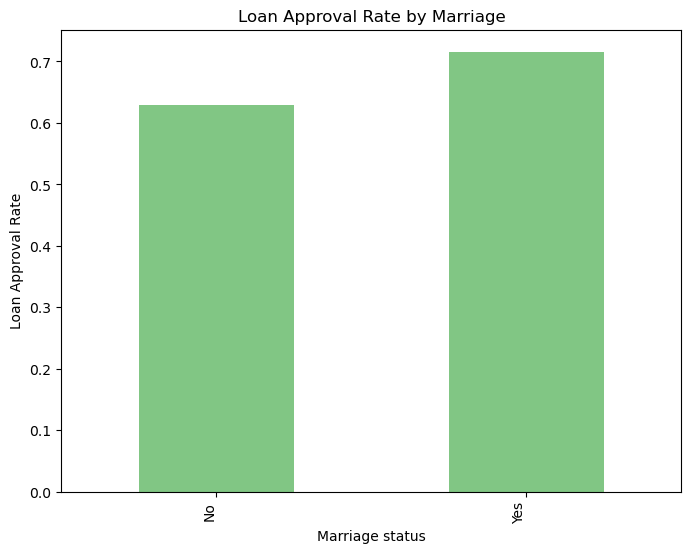

In [21]:
# Visual representation of how being married can impact loan approval

loan_approval_rate = dataset.groupby('Married')['Loan_Status'].mean()
print(loan_approval_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
loan_approval_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Loan Approval Rate by Marriage')
plt.xlabel('Marriage status')
plt.ylabel('Loan Approval Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()